In [2]:
import matplotlib.pyplot as plt
import pandas as np
import numpy as np
import seaborn as sn
import os
import math
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Image Visualization

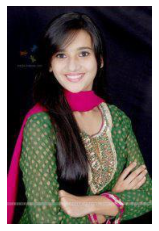

In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../input/withwithout-mask/maskdata/maskdata/train/without_mask/0.jpg')
imgplot = plt.imshow(img)
plt.axis(False)
plt.show()

In [4]:
train_machine=ImageDataGenerator(rescale=1/255)

In [5]:
test_machine=ImageDataGenerator(rescale=1/255)

In [6]:
train_data=train_machine.flow_from_directory("../input/withwithout-mask/maskdata/maskdata/train",
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode="binary")

Found 616 images belonging to 2 classes.


In [7]:
test_data=test_machine.flow_from_directory("../input/withwithout-mask/maskdata/maskdata/test",
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode="binary")

Found 198 images belonging to 2 classes.


# Building a Machine

In [8]:
Machine=Sequential()
Machine.add(Conv2D(64,(3,3),input_shape=(200,200,3),activation="relu"))
Machine.add(MaxPooling2D(pool_size=(2,2)))
Machine.add(Conv2D(32,(3,3),activation="relu"))
Machine.add(MaxPooling2D(pool_size=(2,2)))
Machine.add(Conv2D(16,(3,3),activation="relu"))
Machine.add(MaxPooling2D(pool_size=(2,2)))
Machine.add(Flatten())
Machine.add(Dense(units=512,activation="relu"))
Machine.add(Dense(units=1,activation="sigmoid"))

In [9]:
from keras.optimizers import RMSprop,SGD

In [10]:
Machine.compile(optimizer=RMSprop(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])

# Training the Image data:

In [11]:
Machine.fit(train_data,steps_per_epoch=5,epochs=40,validation_data=test_data)

Epoch 1/40
5/5 [==============================] - 5s 1s/step - loss: 1.4927 - accuracy: 0.7028 - val_loss: 0.9456 - val_accuracy: 0.3333
Epoch 2/40
5/5 [==============================] - 3s 732ms/step - loss: 0.6762 - accuracy: 0.5537 - val_loss: 0.6961 - val_accuracy: 0.3889
Epoch 3/40
5/5 [==============================] - 3s 739ms/step - loss: 0.8666 - accuracy: 0.6852 - val_loss: 0.7165 - val_accuracy: 0.3333
Epoch 4/40
5/5 [==============================] - 3s 813ms/step - loss: 0.7234 - accuracy: 0.4657 - val_loss: 0.6956 - val_accuracy: 0.3586
Epoch 5/40
5/5 [==============================] - 3s 730ms/step - loss: 0.6777 - accuracy: 0.7500 - val_loss: 0.7376 - val_accuracy: 0.3333
Epoch 6/40
5/5 [==============================] - 3s 728ms/step - loss: 0.5661 - accuracy: 0.6694 - val_loss: 2.7667 - val_accuracy: 0.3333
Epoch 7/40
5/5 [==============================] - 3s 742ms/step - loss: 0.8184 - accuracy: 0.6343 - val_loss: 0.8822 - val_accuracy: 0.3333
Epoch 8/40
5/5 [=======

In [12]:
train_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [14]:
from keras.preprocessing import image

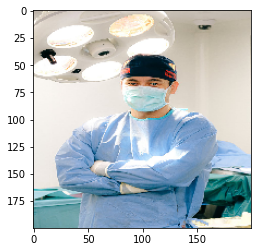

WithMask


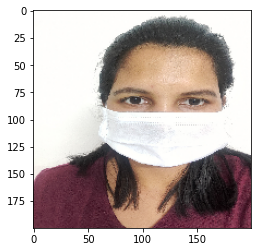

WithMask


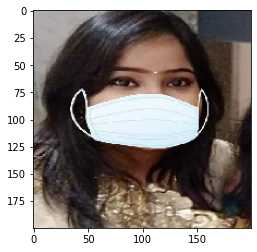

WithMask


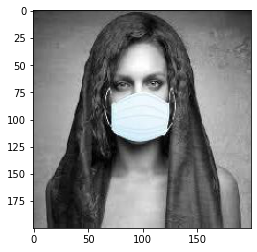

WithMask


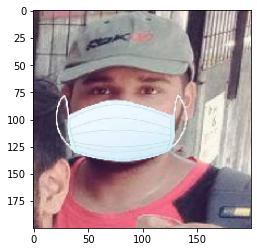

WithMask


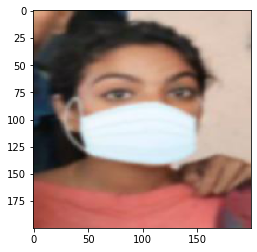

WithMask


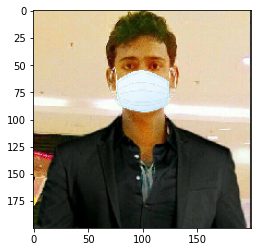

WithMask


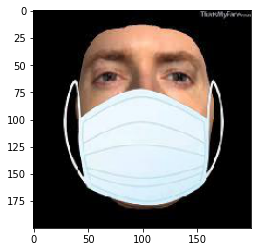

WithMask


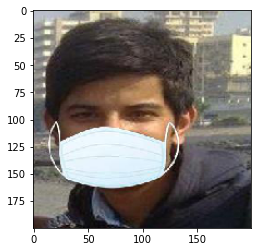

WithMask


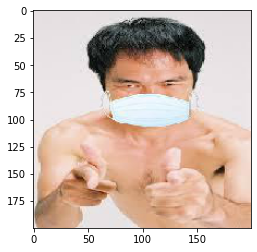

WithoutMask


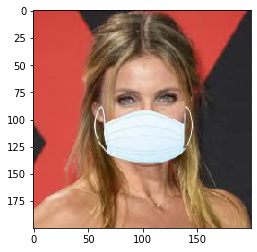

WithMask


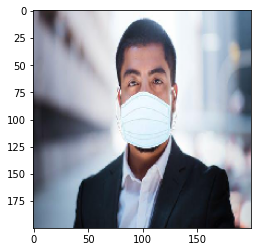

WithMask


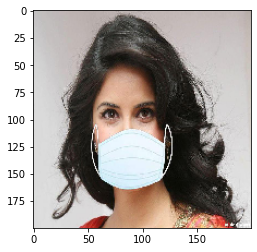

WithMask


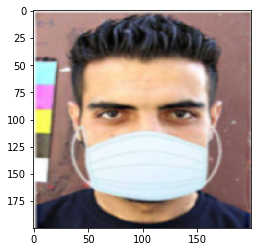

WithMask


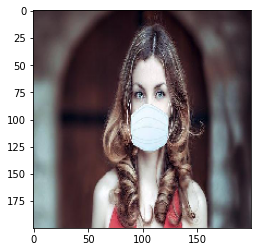

WithMask


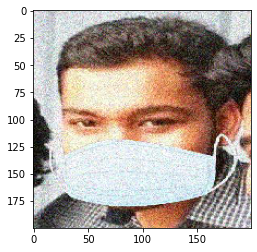

WithMask


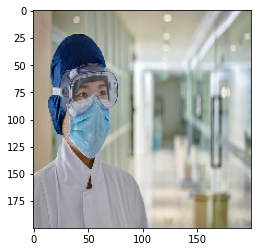

WithMask


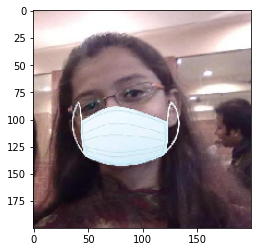

WithMask


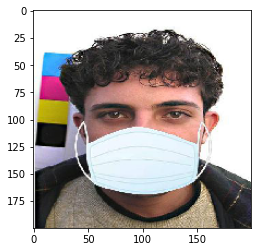

WithMask


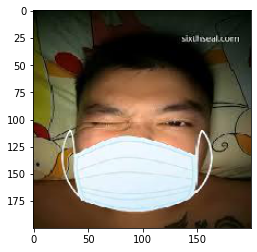

WithMask


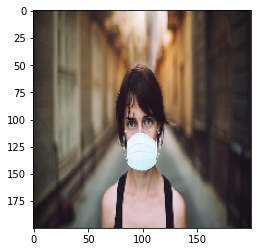

WithMask


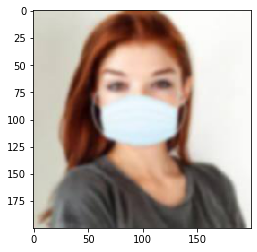

WithMask


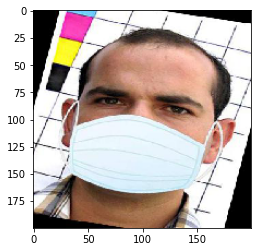

WithMask


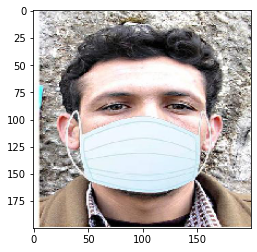

WithMask


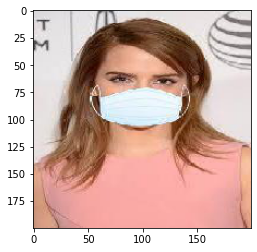

WithMask


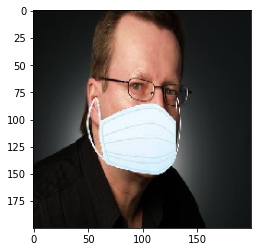

WithMask


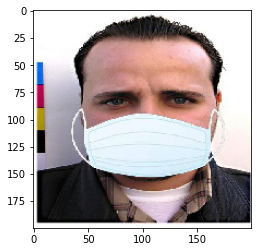

WithMask


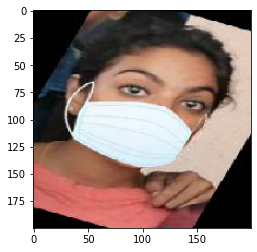

WithMask


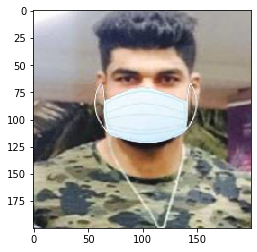

WithMask


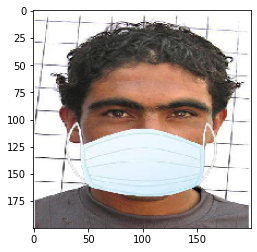

WithMask


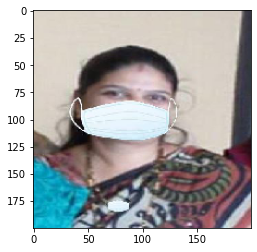

WithMask


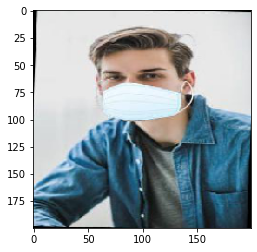

WithMask


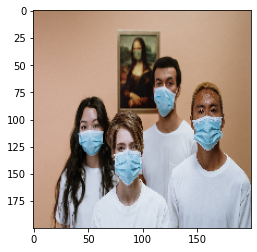

WithMask


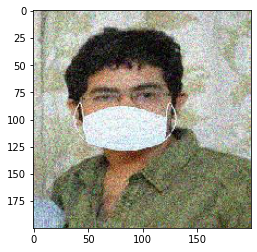

WithMask


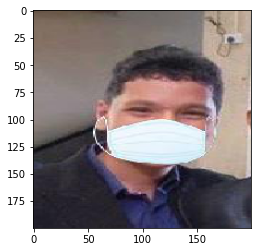

WithMask


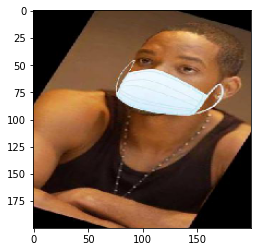

WithMask


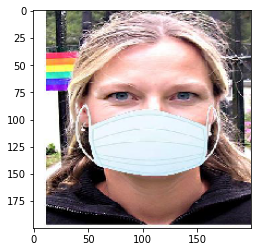

WithMask


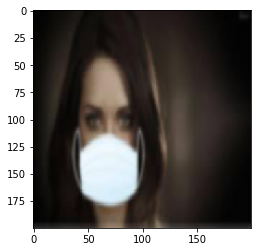

WithMask


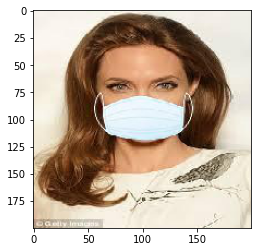

WithMask


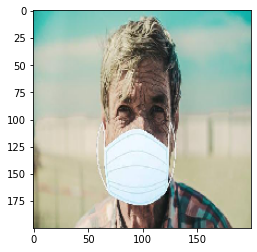

WithMask


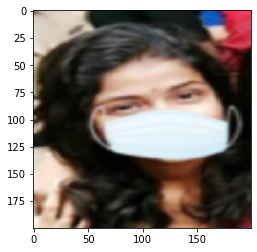

WithMask


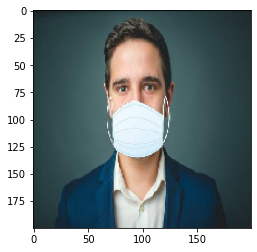

WithMask


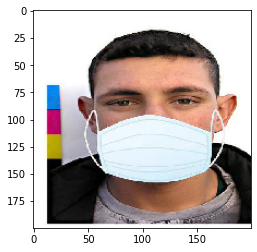

WithMask


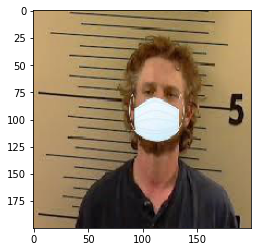

WithMask


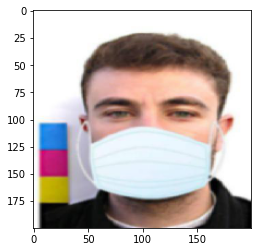

WithMask


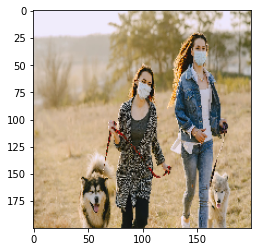

WithoutMask


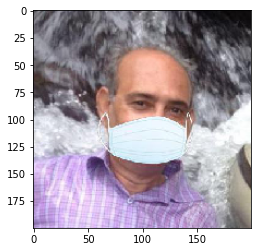

WithMask


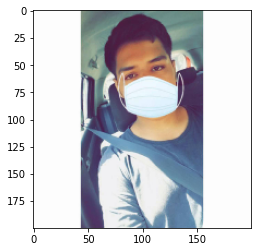

WithMask


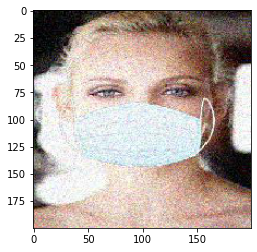

WithMask


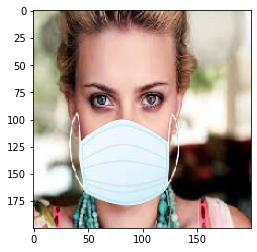

WithMask


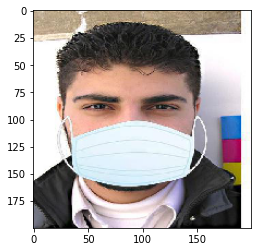

WithMask


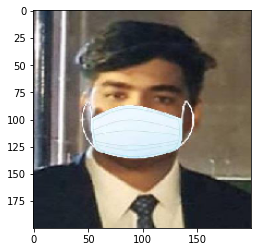

WithMask


In [22]:
path="../input/withwithout-mask/masks2.0/masks/train/1"
for i in os.listdir(path):
    img=image.load_img(path+"//"+ i,target_size=(200,200))
    plt.imshow(img)
    
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val=Machine.predict(images)
    if val==0:
        print("WithMask")
    else:
        print("WithoutMask")
   

In [ ]:
from keras.preprocessing import image

In [21]:
img=image.load_img("../input/withwithout-mask/masks2.0/masks/test/1/0-with-mask.jpg",target_size=(200,200))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
result=Machine.predict(img)
if result==0:
    print("With Mask")
else:
    print("Without Mask")

With Mask
